### JFCowboy

# Description of Assignment

This notebook is a example of authorship atribution.
The purpose is to determinate what is more important for discriminating among these authors: content or style

## Activity:

Assign a text of unknown authorship to one candidate author.

## The DataSet
The corpus is a collection of texts from 5 Mexican Poets:
>Efraín Huerta

>Octavio Paz

>Jaime Sabines

>Rosario Castellanos

>Rubén Bonifaz

The data set is from the paper 
Authorship Attribution using Word Sequences. Rosa María Coyotl-Morales, Luis Villaseñor-Pineda,
Manuel Montes-y-Gómez and Paolo Rosso. CIARP 2006

---

# Work Description
To evalaluate the purpose, I will evaluate the corpus with 2 aproximations in the feature extration of the documents, one group is using a features that exploits the content and other group focus in the style.

## Process
1) I will do a BoW representation, this will be a baseline of the experiments.

2) I will do another Feature Representations of documents like:

* Bag of N-grams of words
* Bag of N-grams of characters
* tfidf
* tfidf of N-grams of words
* tfidf of N-grams of Characters

in the experiments that use words I decide  to use the StopWords because this could meaning related to the author's style.
    
3)Download, unzip and read the documents.

* Download the documents from <a href="http://lin99.github.io/NLPTM-2016/3.Docs/poemas.zip"> Poemas DataSet NLPTM-2016</a>
* unzip and create folders and document necesary to do a experiment
* Read the documents take care about the encoding
    
4) Apply a partition of the dataset to Test-Validation and Train, and save the partition to do the experiments whit the diferents Feature Representations.

5) Train a SVM lineal with each Feature representation.
    
* Exploring parameters: Train with Train dataset and test whit validation dataset changing the C parameter of SVM (prob whit diferent powers of 2)
* Select the best parameter of C for each representation proving whit a set of Train and validation.    
* Apply Stratified 10 Fold to verify the performance
* All the evalution is with macro F1 score
    
6) Report results


---

# Experiment

## Headers & Imports

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import sklearn as skl

from sklearn import metrics, svm
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Obtain and prepocess the corpus

To dowload the documents in a linux enviroment you can run wget command, after you need unzip the file you can use a unzip -d command

##### %%sh
wget http://lin99.github.io/NLPTM-2016/3.Docs/poemas.zip
<br>
unzip -d poemas.zip

You can see the files in your directory

In [25]:
%%sh
ls -R -C

.:
Assigment_3.ipynb  poemas  poemas.zip

./poemas:
EfrainH  JaimeS  OctavioP  RosarioC  RubenB

./poemas/EfrainH:
ABSOLUTO_AMOR.txt
ALELUYA_COCODRILOS_SEXUALES_ALELUYA.txt
AY_POETA.txt
BUENOS_DÍAS_A_DIANA_CAZADORA.txt
CANCIÓN_DE_LA_DONCELLA_DEL_ALBA.txt
CONTINUIDAD.txt
DECLARACIÓN_DE_AMOR.txt
DECLARACIÓN_DE_ODIO.txt
DOS.txt
ELEGÍA.txt
ELEGÍA_DE_LA_ROSA_BLANCA.txt
EL_AMOR.txt
EL_RETORNO.txt
EL_TAJÍN.txt
ERES_AMOR.txt
ESA_SANGRE.txt
ESA_SONRISA.txt
ESTRELLA_EN_ALTO.txt
ESTUARIO.txt
EUNICE.txt
ÉSTE_ES_UN_AMOR.txt
LAS_VOCES_PROHIBIDAS.txt
LA_AMANTE.txt
LA_ESTRELLA.txt
LA_MUCHACHA_EBRIA.txt
LA_NOCHE_DE_LA_PERVERSIÓN.txt
LA_PALOMA_Y_EL_SUEÑO.txt
LA_ROSA_PRIMITIVA.txt
LA_SUSODICHA.txt
LÍNEA_DEL_ALBA.txt
LLUVIA_NUEVA.txt
LOS_HOMBRES_DEL_ALBA.txt
LOS_RUIDOS_DEL_ALBA.txt
MEDITACIÓN_DE_LA_ROSA.txt
ÓRDENES_DE_AMOR.txt
PAISAJE_DUDOSO.txt
PARA_GOZAR_TU_PAZ.txt
PAUSA.txt
PEQUEÑO_LARIYSSE.txt
PRIMER_CANTO_DE_ABANDONO.txt
QUIÉN_QUE_ES_NO_AMA_A_VIRGINIA_WOOLF.txt
RESPONSO_POR_UN_POETA_DE

In [2]:
#Obtain the folders and files names
root = "poemas/"
folders = []  #Vector of folders names
files   = []  #Vector of files names
labels  = []  #Vector of "labels" or correct clase for each file

for folder in os.listdir(root):
    folders.append(folder)
    
for folder in folders:
    for arch in os.listdir(root + folder + '/'):
        files.append(folder + '/' + arch)
        labels.append(folder)
    
print "Los directorios son:", folders
print "Algunos archivos son:\n", files[:5], "\n",files[100:105]
print "Los labels correspondientes: \n", labels[:5], labels[100:105]

Los directorios son: ['JaimeS', 'RubenB', 'OctavioP', 'RosarioC', 'EfrainH']
Algunos archivos son:
['JaimeS/QUIERO_APOYAR_MI_CABEZA.txt', 'JaimeS/ALGO_SOBRE_LA_MUERTE_DEL_MAYOR_SABINES_PRIMERA_PARTE_XII.txt', 'JaimeS/NO_ES_NADA_DE_TU_CUERPO.txt', 'JaimeS/LOS_DI\xcc\x81AS_INU\xcc\x81TILES.txt', 'JaimeS/ADA\xcc\x81N_Y_EVA.txt'] 
['RubenB/VENCIDO_EL_ATRIO_DESVESTIDA.txt', 'RubenB/NO_ES_UNA_DESGRACIA_ABRIR_LOS_OJOS.txt', 'RubenB/DEPREDADORAS_DE_ALEGRI\xcc\x81A.txt', 'RubenB/ADIO\xcc\x81S_ADIO\xcc\x81S_MIS_COMPAN\xcc\x83EROS.txt', 'RubenB/EN_QUE\xcc\x81_VOY_A_CREER_AHORA.txt']
Los labels correspondientes: 
['JaimeS', 'JaimeS', 'JaimeS', 'JaimeS', 'JaimeS'] ['RubenB', 'RubenB', 'RubenB', 'RubenB', 'RubenB']


In [3]:
#show a number of poems/files in a folder/by author
for folder in folders:
    print "The dataset has %s number of poems writen by %s" % (labels.count(folder), folder)

The dataset has 80 number of poems writen by JaimeS
The dataset has 70 number of poems writen by RubenB
The dataset has 75 number of poems writen by OctavioP
The dataset has 80 number of poems writen by RosarioC
The dataset has 48 number of poems writen by EfrainH


Now I have the files directions, because I have a small dataset I will charge all the data poems in memory

In [4]:
poemsText = []  #Array with a text of the poems
for arch in files:
    doc = open(root+arch)
    poemsText.append(doc.read().decode('latin-1'))

In [5]:
#Ejemplo de poema en el dataset
print poemsText[1]

ALGO SOBRE LA MUERTE DEL MAYOR SABINES. PRIMERA PARTE. XII


Morir es retirarse, hacerse a un lado,
ocultarse un momento, estarse quieto,
pasar el aire de una orilla a nado
y estar en todas partes en secreto.

Morir es olvidar, ser olvidado,
refugiarse desnudo en el discreto
calor de Dios, y en su cerrado
puño, crecer igual que un feto.

Morir es encenderse bocabajo
hacia el humo y el hueso y la caliza
y hacerse tierra y tierra con trabajo.

Apagarse es morir, lento y aprisa
tomar la eternidad como a destajo
y repartir el alma en la ceniza.



### Extracting Features of the documents

Represtations

* Bag of N-grams of words
* Bag of N-grams of characters
* tfidf
* tfidf of N-grams of words
* tfidf of N-grams of Characters

In [6]:
min_df = 5  #Min Document Frecuency
#Bag of words representations
BoW = CountVectorizer(min_df= min_df)                                #Bag of Words
BoW_ngrams = CountVectorizer(ngram_range=(1, 3) ,min_df= min_df)     #Bag of Words with 1 to 4-grams of words
BoC_ngrams = CountVectorizer(ngram_range=(4, 5), 
                                min_df= min_df, analyzer='char')     #Bag of Characters whit 4 to 5-grams of chars


#TfIdf Representations
tfidfW = TfidfVectorizer(min_df= min_df)                         #TfIdf of words
tfidfW_ngrams = TfidfVectorizer(ngram_range=(1, 4)
                               , min_df= min_df)                 #TfIdf of words with 1 to 4-grams of words
tfidfC_ngrams = TfidfVectorizer(ngram_range=(4, 5), 
                                min_df= min_df, analyzer='char') #TfIdf of Characters with 3 to 6-grams of words

In [7]:
#Vectors of Features of each poem, by each representation
Xbow = BoW.fit_transform(poemsText)
Xbow_ngrams = BoW_ngrams.fit_transform(poemsText)
Xboc_ngrams = BoC_ngrams.fit_transform(poemsText)

XtfidfW = tfidfW.fit_transform(poemsText)
XtfidfW_ngrams = tfidfW_ngrams.fit_transform(poemsText)
XtfidfC_ngrams = tfidfC_ngrams.fit_transform(poemsText)

### Partitioning of the dataset to Test-Validation and Train

Using StratifiedKFold method from sklearn to do a approximately set with the same percentage of samples in each class.

In [8]:
skf = StratifiedKFold(labels, 10)
print "Example of the diferents set in the 10-fold"
for idx, (train, test) in enumerate(skf):
    print "\n%s-simo Fold" % (idx+1)
    #print "\nTrain:%s \nTest:%s" % (idx, train, test)
    print "\nSummary of the DataSet\n"
    
    cntTrain = {}
    cntTest  = {}
    for idx in train:
        lName = labels[idx]
        if lName not in cntTrain:
            cntTrain[lName] = 0
        cntTrain[lName] += 1
    
    for idx in test:
        lName = labels[idx]
        if lName not in cntTest:
            cntTest[lName] = 0
        cntTest[lName] += 1
    
    for name in cntTrain.keys():
        line = "%s has %s in TrainSet and %s in TestSet it is the %.2f of elements" \
        % (name, str(cntTrain[name]), str(cntTest[name]), cntTest[name]*100.0/cntTrain[name]) 
        print line

Example of the diferents set in the 10-fold

1-simo Fold

Summary of the DataSet

RosarioC has 72 in TrainSet and 8 in TestSet it is the 11.11 of elements
OctavioP has 67 in TrainSet and 8 in TestSet it is the 11.94 of elements
RubenB has 63 in TrainSet and 7 in TestSet it is the 11.11 of elements
EfrainH has 43 in TrainSet and 5 in TestSet it is the 11.63 of elements
JaimeS has 72 in TrainSet and 8 in TestSet it is the 11.11 of elements

2-simo Fold

Summary of the DataSet

RosarioC has 72 in TrainSet and 8 in TestSet it is the 11.11 of elements
OctavioP has 67 in TrainSet and 8 in TestSet it is the 11.94 of elements
RubenB has 63 in TrainSet and 7 in TestSet it is the 11.11 of elements
EfrainH has 43 in TrainSet and 5 in TestSet it is the 11.63 of elements
JaimeS has 72 in TrainSet and 8 in TestSet it is the 11.11 of elements

3-simo Fold

Summary of the DataSet

RosarioC has 72 in TrainSet and 8 in TestSet it is the 11.11 of elements
OctavioP has 67 in TrainSet and 8 in TestSet it i

creating a validation set for a new set to doing a better selection of the parameters.

In [9]:
#Split the sets in train and test
Xval_train, Xval_test, Yval_train, Yval_test = train_test_split(range(len(poemsText)), labels, test_size=0.20, random_state=0)
#Split the set of train in train and validation
Xval2_train, Xval_val, Yval2_train, Yval_val = train_test_split(Xval_train, Yval_train, test_size=0.20)

---

## SVM Classifier

First I define a method to do an exploration of the best C parameter of SVM for each representation.

In [10]:
'''
# doExploration analyze the best parameter por a SVM linear
# trainIdx index of the data in the train data set
# testIdx index of the data in the test data set
'''
def doExploration(trainIdx, testIdx, features, inf=-10, sup=10, step=1, pote=True):
    
    X_train  = features[trainIdx]
    X_test   = features[testIdx]
    Y_train  = [labels[idx] for idx in trainIdx]
    Y_test   = [labels[idx] for idx in testIdx]
    
    f1_train = []
    
    for pot in xrange(inf, sup, step):
        c = pot
        if pote:
            c = 2**pot
        else:
            c /= 10.0
        clf_svm = svm.LinearSVC(C = c)
        clf_svm.fit(X_train, Y_train)
        prediction = clf_svm.predict(X_test)
    
        f1_train.append(metrics.f1_score(Y_test, prediction, average='macro'))
        #print c, "=>", metrics.f1_score(Y_test, prediction, average='macro')
    
    f1_train = np.array(f1_train)
    bestC = f1_train.argmax()
    
    return f1_train, bestC

#### Finding the best C parameter for each representation

In [11]:
#Define a array to group the diferent features representations
featuresArray = [Xbow, Xbow_ngrams, Xboc_ngrams, XtfidfW, XtfidfW_ngrams
                 ,XtfidfC_ngrams]
featuresNamesArray = ["BoW", "BoW ngrams", "BoC ngrams", "tf-idf of words"
                      ,"tf-idf words ngrams", "tf-idf char ngrams"]



The parameter search for BoW
The best C_parameter is 2^ -7
            2**-10    2**-9     2**-8     2**-7     2**-6     2**-5     2**-4  \
F1 Score  0.606393  0.60552  0.620806  0.635436  0.546724  0.530897  0.496276   

             2**-3     2**-2     2**-1      2**0      2**1      2**2  \
F1 Score  0.536941  0.512958  0.499317  0.501555  0.501555  0.514217   

              2**3      2**4      2**5      2**6      2**7      2**8      2**9  
F1 Score  0.514217  0.514217  0.514217  0.514217  0.530132  0.530132  0.530132  
Axes(0.125,0.125;0.775x0.775)


The parameter search for BoW ngrams
The best C_parameter is 2^ -9
            2**-10     2**-9     2**-8     2**-7    2**-6     2**-5     2**-4  \
F1 Score  0.571328  0.617453  0.581345  0.516151  0.51751  0.530927  0.500718   

             2**-3     2**-2     2**-1      2**0      2**1      2**2  \
F1 Score  0.534821  0.534821  0.517151  0.522077  0.522077  0.522077   

              2**3      2**4      2**5      2**6      2**7     

/opt/anaconda/envs/mindlabenv/lib/python2.7/site-packages/sklearn/metrics/metrics.py:1771: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


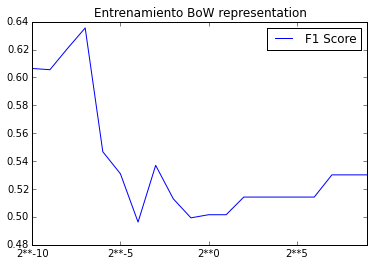

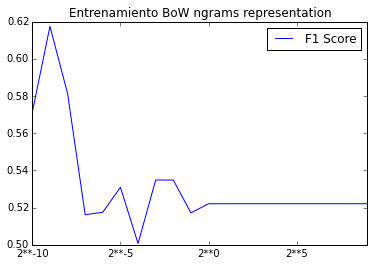

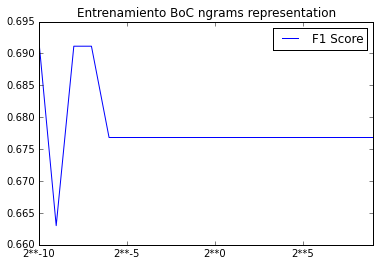

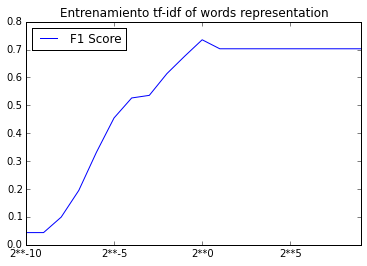

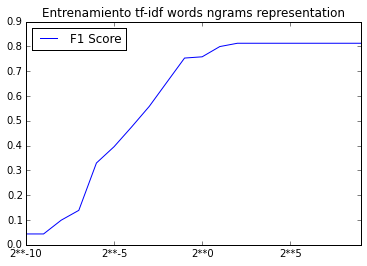

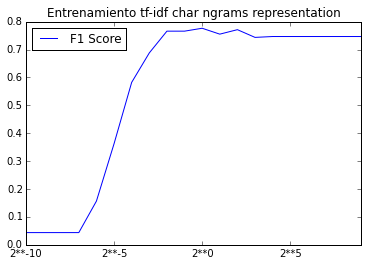

In [12]:
inf = -10
sup = 10
bestCbyRep = []
for idx, feature in enumerate(featuresArray):
    print "\n\nThe parameter search for", featuresNamesArray[idx]
    f1res, bestC = doExploration(Xval2_train, Xval_val, feature, inf=inf, sup=sup)
    scores = pd.DataFrame(data=f1res, index=["2**%s" % (pot) for pot in range(inf, sup)], columns=["F1 Score"]).T
    f1res = np.array(f1res)
    
    #add the best C parameter to doing the next part of the experiment
    bestCbyRep.append(f1res.argmax()+inf)
    
    print "The best C_parameter is 2^", f1res.argmax()+inf
    print scores
    plot = scores.T.plot(title="Entrenamiento %s representation" % (featuresNamesArray[idx]))
    print plot
    

In [13]:
for idx, feature in enumerate(featuresNamesArray):
    print "%s best c= 2^%s = %.3f" % (feature, bestCbyRep[idx], 2**bestCbyRep[idx])

BoW best c= 2^-7 = 0.008
BoW ngrams best c= 2^-9 = 0.002
BoC ngrams best c= 2^-10 = 0.001
tf-idf of words best c= 2^0 = 1.000
tf-idf words ngrams best c= 2^2 = 4.000
tf-idf char ngrams best c= 2^0 = 1.000


This process was run in a different and small dataset(excluding the test dataset) because the objetive is to found the best C parameter and not to verify the performance.

#### Run the experiments in the 10 fold groups
In this section I run a LinearSVM with all the representations

In [14]:
summary = []
confM = []
for idx, features in enumerate(featuresArray):
    scoreF1 = []
    clf = svm.LinearSVC(C=2**bestCbyRep[idx])
    for train, test in skf:
        #print "\n%s-simo Fold" % (idx+1)
        X = features[train]
        Xtest = features[test]
        Y = [labels[indice] for indice in train]
        Ytest = [labels[indice] for indice in test]
        
        clf.fit(X, Y)
        prediction = clf.predict(Xtest)
        f1 = metrics.f1_score(Ytest, prediction, average='macro')
        scoreF1.append(f1)
    scores = pd.DataFrame(data=scoreF1, columns=["F1 Score"], index=["%s-simo Fold" % (x) for x in xrange(1,11)]).T
    scoreF1 = np.array(scoreF1)
    summary.append("%0.2f (+/- %0.2f)" % (scoreF1.mean(), scoreF1.std() * 2))
    
    print '---'*7, "Summary ",featuresNamesArray[idx], '---'*7
    print scores
    print("F1_score: %0.2f (+/- %0.2f)" % (scoreF1.mean(), scoreF1.std() * 2))
    print '---'*20

--------------------- Summary  BoW ---------------------
          1-simo Fold  2-simo Fold  3-simo Fold  4-simo Fold  5-simo Fold  \
F1 Score     0.738039     0.655281     0.807222     0.722923     0.752924   

          6-simo Fold  7-simo Fold  8-simo Fold  9-simo Fold  10-simo Fold  
F1 Score     0.672619     0.606221     0.617949     0.712381       0.64381  
F1_score: 0.69 (+/- 0.12)
------------------------------------------------------------
--------------------- Summary  BoW ngrams ---------------------
          1-simo Fold  2-simo Fold  3-simo Fold  4-simo Fold  5-simo Fold  \
F1 Score     0.743333     0.660837      0.72423     0.622982     0.659518   

          6-simo Fold  7-simo Fold  8-simo Fold  9-simo Fold  10-simo Fold  
F1 Score     0.610299     0.583394     0.657656     0.604511      0.637671  
F1_score: 0.65 (+/- 0.10)
------------------------------------------------------------
--------------------- Summary  BoC ngrams ---------------------
          1-simo Fold  

## Results

In [15]:
data = zip(summary, ["2^%s"%(x) for x in bestCbyRep])
pd.DataFrame(data=data, columns=["F1 Score Macro", "C parameter"], index=featuresNamesArray)

,F1 Score Macro,C parameter
BoW,0.69 (+/- 0.12),2^-7
BoW ngrams,0.65 (+/- 0.10),2^-9
BoC ngrams,0.77 (+/- 0.11),2^-10
tf-idf of words,0.74 (+/- 0.15),2^0
tf-idf words ngrams,0.75 (+/- 0.12),2^2
tf-idf char ngrams,0.84 (+/- 0.10),2^0


The best results are for the TF-IDF char nGrams representation 4 and 5-grams, this could be because the ngrams of characters obatain a interesting features in the spanish grammar like, puntuation, the Beginings and endings (time, conjugations, etc) of the words. I can say that in this task the style is more relevant than the content. 

The based line uses content, in both approaches where  I used character ngrams as representing the style got better results than the ones where I used words as representation of the content. The best line was improved in all the experiments for at least 1 percent taking in to account the error range.

All the representations using character-ngrams got better results than the ones using words and words ngrams. This also apply for the tf-idf representation  using words.